In [2]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
df_train = pd.read_csv(r'C:\Users\1994a\Documents\DataScience\TitanicSpaceshipClassificationJupyterNotebook\train.csv')

In [4]:
df_train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4        303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   
7          0.0        0.0           0.0     0.0     NaN  Candra Jacostaffey   
8          0.0      785.0          17.0   216.0     0.0       Andona Beston   
9          0.0        0.0           0.0     0.0     0.0      Erraiam Flatic   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True

In [5]:
pd.set_option('display.max_rows', None)

<Axes: xlabel='Age', ylabel='Transported'>

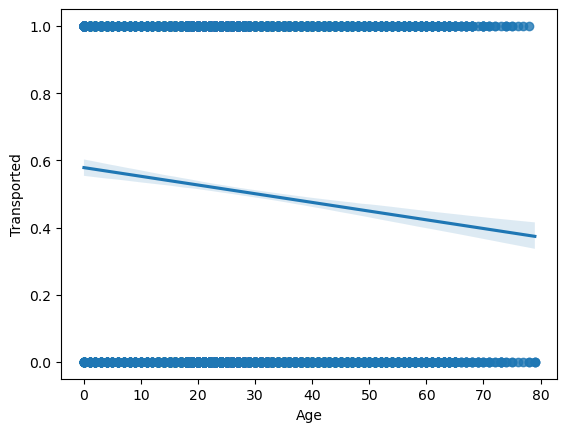

In [6]:
# loading dataset
sns.regplot(data=df_train, x="Age", y="Transported")

<Axes: xlabel='Transported', ylabel='Age'>

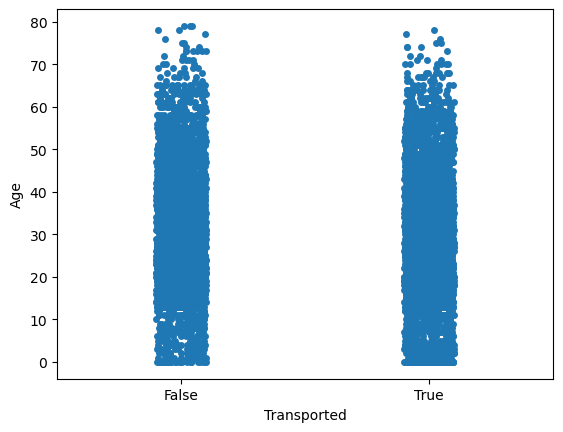

In [7]:


sns.stripplot(x ='Transported', y ='Age', data = df_train, 
              jitter = True, dodge = True)

<Axes: xlabel='Transported', ylabel='Age'>

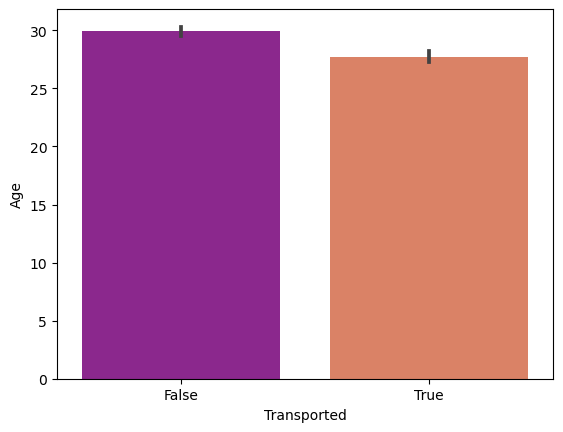

In [8]:
# plot the graph using the default estimator mean
sns.barplot(x ='Transported', y ='Age', data = df_train, palette ='plasma')
 

In [9]:
df_train.shape

(8693, 14)

In [10]:
#sns.catplot(x="HomePlanet", y="Age", hue="Transported", kind="swarm", data=df_train)

E:\AppInstalled\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


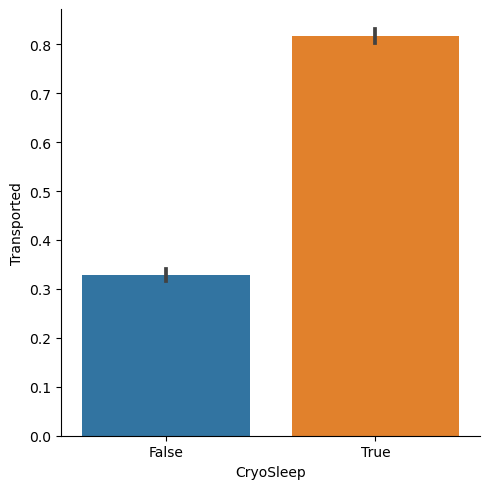

In [11]:
sns.catplot(kind='bar', x='CryoSleep', y='Transported',data=df_train)

In [12]:
# sns.set_style('ticks')
# sns.pairplot(df_train,diag_kind='kde', kind='cat', palette='hus1')
# plt.show()

In [13]:
# print('HomePlanet null ', df_train['HomePlanet'].isnull().sum())
# print('CryoSleep null ', df_train['CryoSleep'].isnull().sum())
# print('Destination null ', df_train['Destination'].isnull().sum())
# print('Age null ', df_train['Age'].isnull().sum())
# print('VIP null ', df_train['VIP'].isnull().sum())
# print('Transported null ', df_train['Transported'].isnull().sum())

In [14]:
# print('HomePlanet not null ', df_train['HomePlanet'].notnull().sum())
# print('CryoSleep not null ', df_train['CryoSleep'].notnull().sum())
# print('Destination not null ', df_train['Destination'].notnull().sum())
# print('Age not null ', df_train['Age'].notnull().sum())
# print('VIP not null ', df_train['VIP'].notnull().sum())
# print('Transported not null ', df_train['Transported'].notnull().sum())

In [15]:
##df_train after removing null values
# df_train = df_train.dropna()

In [16]:
# sns.set_style('ticks')
# sns.pairplot(df_train,diag_kind='kde', kind='cat', palette='hus1')
# plt.show()

In [17]:
for col in df_train.columns:
    tot_null_values = df_train[col].isnull().sum() 
    tot_not_null_values = df_train[col].notnull().sum() 
    print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)



PassengerId 0  percentage:  0.0
HomePlanet 201  percentage:  2.312205222592891
CryoSleep 217  percentage:  2.4962613597147127
Cabin 199  percentage:  2.289198205452663
Destination 182  percentage:  2.093638559760727
Age 179  percentage:  2.0591280340503855
VIP 203  percentage:  2.3352122397331185
RoomService 181  percentage:  2.082135051190613
FoodCourt 183  percentage:  2.105142068330841
ShoppingMall 208  percentage:  2.392729782583688
Spa 183  percentage:  2.105142068330841
VRDeck 188  percentage:  2.1626596111814105
Name 200  percentage:  2.300701714022777
Transported 0  percentage:  0.0


In [18]:
df_train.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [19]:
df_train.shape

(8693, 14)

In [20]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [21]:
df_train.shape

(8693, 14)

In [22]:
df_train.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False

In [23]:
# df_train['HomePlanet'].fillna(method='ffill', inplace=True)
# df_train['Cabin'].fillna(method='ffill', inplace=True)
# df_train['Destination'].fillna(method='ffill', inplace=True)
# df_train['VIP'].fillna(method='ffill', inplace=True)

In [24]:
df_train['HomePlanet'].isnull().sum()

201

In [25]:
for col in df_train.columns:
    tot_null_values = df_train[col].isnull().sum() 
    tot_not_null_values = df_train[col].notnull().sum() 
    print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)

PassengerId 0  percentage:  0.0
HomePlanet 201  percentage:  2.312205222592891
CryoSleep 217  percentage:  2.4962613597147127
Cabin 199  percentage:  2.289198205452663
Destination 182  percentage:  2.093638559760727
Age 179  percentage:  2.0591280340503855
VIP 203  percentage:  2.3352122397331185
RoomService 181  percentage:  2.082135051190613
FoodCourt 183  percentage:  2.105142068330841
ShoppingMall 208  percentage:  2.392729782583688
Spa 183  percentage:  2.105142068330841
VRDeck 188  percentage:  2.1626596111814105
Name 200  percentage:  2.300701714022777
Transported 0  percentage:  0.0


In [26]:
df_train.loc[:, ['PassengerId', 'CryoSleep']].head(100)

PassengerId CryoSleep
0      0001_01     False
1      0002_01     False
2      0003_01     False
3      0003_02     False
4      0004_01     False
5      0005_01     False
6      0006_01     False
7      0006_02      True
8      0007_01     False
9      0008_01      True
10     0008_02      True
11     0008_03     False
12     0009_01     False
13     0010_01     False
14     0011_01     False
15     0012_01     False
16     0014_01     False
17     0015_01     False
18     0016_01      True
19     0017_01     False
20     0017_02     False
21     0020_01      True
22     0020_02      True
23     0020_03      True
24     0020_04     False
25     0020_05      True
26     0020_06     False
27     0022_01     False
28     0024_01      True
29     0025_01     False
30     0026_01     False
31     0028_01     False
32     0030_01     False
33     0031_01     False
34     0031_02     False
35     0031_03     False
36     0034_01      True
37     0035_01     False
38     0036_01     False
39     0038_01     False
40     0039_01      True
41     0041_01      True
42     0043_01     False
43     0044_01      True
44     0044_02      True
45     0044_03      True
46     0045_01     False
47     0045_02      True
48     0050_01     False
49     0051_01     False
50     0052_01     False
51     0053_01     False
52     0056_01     False
53     0056_02      True
54     0056_03     False
55     0058_01      True
56     0061_01     False
57     0062_01     False
58     0064_01      True
59     0064_02      True
60     0066_01     False
61     0067_01      True
62     0067_02     False
63     0067_03     False
64     0068_01     False
65     0069_01     False
66     0070_01     False
67     0071_01     False
68     0072_01     False
69     0073_01     False
70     0074_01     False
71     0076_01     False
72     0077_01     False
73     0078_01     False
74     0081_01      True
75     0082_01     False
76     0082_02      True
77     0082_03     False
78     0084_01     False
79     0085_01      True
80     0086_01     False
81     0088_01      True
82     0090_01      True
83     0091_01      True
84     0091_02     False
85     0092_01     False
86     0092_02      True
87     0092_03      True
88     0097_01     False
89     0098_01     False
90     0098_02     False
91     0099_01     False
92     0099_02       NaN
93     0101_01      True
94     0102_01     False
95     0103_01     False
96     0103_02      True
97     0103_03      True
98     0105_01       NaN
99     0107_01     False

In [27]:
check_df = sqldf('select PassengerId, HomePlanet from df_train')

In [28]:
print(type(check_df))
print(type(df_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
df_train.head(2)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name  \
0          0.0        0.0           0.0    0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0  549.0    44.0     Juanna Vines   

   Transported  
0        False  
1         True

In [30]:
## Creating New Column
df_train['PassengerGroupId'] = df_train.PassengerId.str[:4]

In [31]:
for index, row in df_train.iterrows():
    # Column HomePlanet Correction 
    passenger_group_id = str(row["PassengerGroupId"])
    if pd.isna(row['HomePlanet']):
        
        if df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['HomePlanet'].isna())]['HomePlanet'].empty:
                df_train.loc[index, 'HomePlanetCorrected'] = np.nan
                #print('2: ', row['PassengerGroupId'], row['HomePlanet'], df_train.loc[index, 'HomePlanetCorrected'])
        else:
            df_train.loc[index, 'HomePlanetCorrected'] = df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['HomePlanet'].isna())]['HomePlanet'].values[0]
            #print('1: ', row['PassengerGroupId'], row['HomePlanet'], df_train.loc[index, 'HomePlanetCorrected'])
    else:
        df_train.loc[index, 'HomePlanetCorrected'] = row['HomePlanet']
        #print('3: ', row['PassengerGroupId'], row['HomePlanet'], df_train.loc[index, 'HomePlanetCorrected'])
    
    # Column Destination Correction 
    if pd.isna(row['Destination']):
        if df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['Destination'].isna())]['Destination'].empty:
                df_train.loc[index, 'DestinationCorrected'] = np.nan
                #print('5: ', row['PassengerGroupId'], row['Destination'], df_train.loc[index, 'DestinationCorrected'])
        else:
            df_train.loc[index, 'DestinationCorrected'] = df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['Destination'].isna())]['Destination'].values[0]
            #print('4: ', row['PassengerGroupId'], row['Destination'], df_train.loc[index, 'DestinationCorrected'])
    else:
        df_train.loc[index, 'DestinationCorrected'] = row['Destination']
        #print('6: ', row['PassengerGroupId'], row['Destination'], df_train.loc[index, 'DestinationCorrected'])
    
    # Column Cabin Correction 
    if pd.isna(row['Cabin']):
        
        if df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['Cabin'].isna())]['Cabin'].empty:
                df_train.loc[index, 'CabinCorrected'] = np.nan
                #print('8: ', row['PassengerGroupId'], row['Cabin'], df_train.loc[index, 'CabinCorrected'])
        else:
            df_train.loc[index, 'CabinCorrected'] = df_train.loc[(df_train['PassengerGroupId'] == passenger_group_id) & (~df_train['Cabin'].isna())]['Cabin'].values[0]
            #print('7: ', row['PassengerGroupId'], row['Cabin'], df_train.loc[index, 'CabinCorrected'])
    else:
        df_train.loc[index, 'CabinCorrected'] = row['Cabin']
        #print('9: ', row['PassengerGroupId'], row['Cabin'], df_train.loc[index, 'CabinCorrected'])
    

    ## Column VIP Correction
    if pd.isna(row['VIP']):
        df_train.loc[index, 'VIPCorrected'] = False
    else:
        df_train.loc[index, 'VIPCorrected'] = row['VIP']
        
    
    ## Column RoomService Correction
    if pd.isna(row['RoomService']):
        df_train.loc[index, 'RoomServiceCorrected'] = False
    else:
        df_train.loc[index, 'RoomServiceCorrected'] = row['RoomService']
    
    ## Column FoodCourt Correction
    if pd.isna(row['FoodCourt']):
        df_train.loc[index, 'FoodCourtCorrected'] = False
    else:
        df_train.loc[index, 'FoodCourtCorrected'] = row['FoodCourt']
        
    ## Column ShoppingMall Correction
    if pd.isna(row['ShoppingMall']):
        df_train.loc[index, 'ShoppingMallCorrected'] = False
    else:
        df_train.loc[index, 'ShoppingMallCorrected'] = row['ShoppingMall']   
            
    ## Column Spa Correction
    if pd.isna(row['Spa']):
        df_train.loc[index, 'SpaCorrected'] = False
    else:
        df_train.loc[index, 'SpaCorrected'] = row['Spa']      
        
    ## Column VRDeck Correction
    if pd.isna(row['VRDeck']):
        df_train.loc[index, 'VRDeckCorrected'] = False
    else:
        df_train.loc[index, 'VRDeckCorrected'] = row['VRDeck']   
        
    
    ## Column CryoSleep Correction
    if pd.isna(row['CryoSleep']):
        df_train.loc[index, 'CryoSleepCorrected'] = False
    else:
        df_train.loc[index, 'CryoSleepCorrected'] = row['CryoSleep']   
        
        
        
        

In [32]:
for col in df_train.columns:
    tot_null_values = df_train[col].isnull().sum() 
    tot_not_null_values = df_train[col].notnull().sum() 
    print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)

PassengerId 0  percentage:  0.0
HomePlanet 201  percentage:  2.312205222592891
CryoSleep 217  percentage:  2.4962613597147127
Cabin 199  percentage:  2.289198205452663
Destination 182  percentage:  2.093638559760727
Age 179  percentage:  2.0591280340503855
VIP 203  percentage:  2.3352122397331185
RoomService 181  percentage:  2.082135051190613
FoodCourt 183  percentage:  2.105142068330841
ShoppingMall 208  percentage:  2.392729782583688
Spa 183  percentage:  2.105142068330841
VRDeck 188  percentage:  2.1626596111814105
Name 200  percentage:  2.300701714022777
Transported 0  percentage:  0.0
PassengerGroupId 0  percentage:  0.0
HomePlanetCorrected 111  percentage:  1.2768894512826412
DestinationCorrected 103  percentage:  1.18486138272173
CabinCorrected 99  percentage:  1.1388473484412747
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrect

In [33]:
sqldf('select * from df_train where PassengerGroupId = "0064" ')

PassengerId HomePlanet  CryoSleep   Cabin  Destination   Age  VIP  \
0     0064_01       Mars          1  F/14/S  TRAPPIST-1e  15.0    0   
1     0064_02       None          1   E/3/S  TRAPPIST-1e  33.0    0   

   RoomService  FoodCourt  ShoppingMall  ...  HomePlanetCorrected  \
0          0.0        0.0           0.0  ...                 Mars   
1          0.0        0.0           NaN  ...                 Mars   

   DestinationCorrected CabinCorrected  VIPCorrected RoomServiceCorrected  \
0           TRAPPIST-1e         F/14/S             0                  0.0   
1           TRAPPIST-1e          E/3/S             0                  0.0   

  FoodCourtCorrected ShoppingMallCorrected SpaCorrected  VRDeckCorrected  \
0                0.0                   0.0          0.0              0.0   
1                0.0                     0          0.0              0.0   

  CryoSleepCorrected  
0                  1  
1                  1  

[2 rows x 25 columns]

In [34]:
print(df_train.loc[(df_train['PassengerGroupId'] == "0210") & (~df_train['HomePlanet'].isna())]['HomePlanet'])

Series([], Name: HomePlanet, dtype: object)


In [35]:
if df_train.loc[(df_train['PassengerGroupId'] == "0064") & (~df_train['HomePlanet'].isna())]['HomePlanet'].empty:
    print('na')
else:
    print('not na')

not na


In [36]:
sqldf("""select * from df_train 
        where PassengerGroupId = """ + str('0064'))

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, PassengerGroupId, HomePlanetCorrected, DestinationCorrected, CabinCorrected, VIPCorrected, RoomServiceCorrected, FoodCourtCorrected, ShoppingMallCorrected, SpaCorrected, VRDeckCorrected, CryoSleepCorrected]
Index: []

[0 rows x 25 columns]

In [37]:
sqldf("""select * from df_train 
        where PassengerGroupId = 0064 """) 

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, PassengerGroupId, HomePlanetCorrected, DestinationCorrected, CabinCorrected, VIPCorrected, RoomServiceCorrected, FoodCourtCorrected, ShoppingMallCorrected, SpaCorrected, VRDeckCorrected, CryoSleepCorrected]
Index: []

[0 rows x 25 columns]

In [38]:
df_train.loc[df_train['PassengerGroupId'] == '0001']

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  HomePlanetCorrected  \
0          0.0        0.0           0.0  ...               Europa   

   DestinationCorrected CabinCorrected  VIPCorrected RoomServiceCorrected  \
0           TRAPPIST-1e          B/0/P         False                  0.0   

  FoodCourtCorrected ShoppingMallCorrected SpaCorrected VRDeckCorrected  \
0                0.0                   0.0          0.0             0.0   

  CryoSleepCorrected  
0              False  

[1 rows x 25 columns]

In [39]:
df_train.loc[(df_train['HomePlanet'].isnull()) & (df_train['HomePlanetCorrected'].notnull())].loc[:, ['HomePlanet', 'HomePlanetCorrected']]

HomePlanet HomePlanetCorrected
59          NaN                Mars
113         NaN              Europa
405         NaN                Mars
407         NaN               Earth
438         NaN                Mars
471         NaN              Europa
501         NaN              Europa
505         NaN                Mars
524         NaN               Earth
568         NaN               Earth
637         NaN                Mars
737         NaN              Europa
848         NaN                Mars
920         NaN               Earth
962         NaN               Earth
993         NaN                Mars
999         NaN              Europa
1024        NaN              Europa
1757        NaN               Earth
1892        NaN               Earth
1916        NaN               Earth
2227        NaN               Earth
2246        NaN              Europa
2322        NaN               Earth
2324        NaN              Europa
2425        NaN                Mars
2544        NaN               Earth
2617        NaN               Earth
2638        NaN               Earth
2642        NaN               Earth
2715        NaN               Earth
2898        NaN               Earth
3119        NaN                Mars
3192        NaN              Europa
3277        NaN               Earth
3433        NaN                Mars
3635        NaN               Earth
3769        NaN               Earth
3891        NaN                Mars
3940        NaN              Europa
3951        NaN              Europa
4097        NaN              Europa
4343        NaN              Europa
4374        NaN              Europa
4535        NaN                Mars
4632        NaN                Mars
4702        NaN                Mars
4770        NaN               Earth
5024        NaN              Europa
5079        NaN                Mars
5081        NaN                Mars
5112        NaN                Mars
5316        NaN              Europa
5438        NaN               Earth
5624        NaN                Mars
5689        NaN               Earth
5699        NaN              Europa
5904        NaN                Mars
5906        NaN              Europa
5953        NaN              Europa
6011        NaN               Earth
6054        NaN               Earth
6056        NaN               Earth
6154        NaN              Europa
6169        NaN              Europa
6205        NaN              Europa
6267        NaN              Europa
6450        NaN                Mars
6591        NaN                Mars
6629        NaN               Earth
6735        NaN              Europa
6854        NaN                Mars
7116        NaN              Europa
7211        NaN               Earth
7286        NaN                Mars
7316        NaN               Earth
7339        NaN                Mars
7363        NaN               Earth
7434        NaN               Earth
7682        NaN              Europa
7786        NaN              Europa
7798        NaN              Europa
8077        NaN                Mars
8251        NaN              Europa
8295        NaN                Mars
8353        NaN                Mars
8383        NaN               Earth
8454        NaN               Earth
8489        NaN                Mars
8613        NaN              Europa

In [40]:
df_train.loc[(df_train['Destination'].isnull()) & (df_train['DestinationCorrected'].notnull())].loc[:, ['Destination', 'DestinationCorrected']]

Destination DestinationCorrected
47           NaN          TRAPPIST-1e
128          NaN          TRAPPIST-1e
468          NaN          55 Cancri e
529          NaN          55 Cancri e
540          NaN          55 Cancri e
570          NaN          TRAPPIST-1e
669          NaN          55 Cancri e
686          NaN        PSO J318.5-22
711          NaN          55 Cancri e
1021         NaN          TRAPPIST-1e
1076         NaN          55 Cancri e
1238         NaN          TRAPPIST-1e
1306         NaN          TRAPPIST-1e
1314         NaN          TRAPPIST-1e
1355         NaN          TRAPPIST-1e
1393         NaN        PSO J318.5-22
1630         NaN          55 Cancri e
1660         NaN        PSO J318.5-22
2070         NaN          55 Cancri e
2206         NaN        PSO J318.5-22
2524         NaN          TRAPPIST-1e
2641         NaN          55 Cancri e
2714         NaN          TRAPPIST-1e
2927         NaN          TRAPPIST-1e
3056         NaN          TRAPPIST-1e
3077         NaN          TRAPPIST-1e
3358         NaN          TRAPPIST-1e
3440         NaN          TRAPPIST-1e
3599         NaN          TRAPPIST-1e
3639         NaN        PSO J318.5-22
3655         NaN          55 Cancri e
3665         NaN          TRAPPIST-1e
3731         NaN          TRAPPIST-1e
3811         NaN          55 Cancri e
3913         NaN          TRAPPIST-1e
4123         NaN          TRAPPIST-1e
4128         NaN          TRAPPIST-1e
4180         NaN          TRAPPIST-1e
4307         NaN          TRAPPIST-1e
4352         NaN          TRAPPIST-1e
4381         NaN          55 Cancri e
4389         NaN          TRAPPIST-1e
4450         NaN          TRAPPIST-1e
4514         NaN          TRAPPIST-1e
4627         NaN          TRAPPIST-1e
4673         NaN          TRAPPIST-1e
4773         NaN          TRAPPIST-1e
4975         NaN          TRAPPIST-1e
5002         NaN          TRAPPIST-1e
5282         NaN          55 Cancri e
5368         NaN          55 Cancri e
5454         NaN          TRAPPIST-1e
5524         NaN        PSO J318.5-22
5561         NaN          55 Cancri e
5703         NaN          TRAPPIST-1e
5806         NaN        PSO J318.5-22
5966         NaN          55 Cancri e
6057         NaN        PSO J318.5-22
6466         NaN          TRAPPIST-1e
6498         NaN          TRAPPIST-1e
6552         NaN          TRAPPIST-1e
6602         NaN          TRAPPIST-1e
6629         NaN          TRAPPIST-1e
6648         NaN          TRAPPIST-1e
6980         NaN          TRAPPIST-1e
7114         NaN          TRAPPIST-1e
7438         NaN          TRAPPIST-1e
7510         NaN          TRAPPIST-1e
7512         NaN          TRAPPIST-1e
7780         NaN          TRAPPIST-1e
7872         NaN          TRAPPIST-1e
8012         NaN          TRAPPIST-1e
8038         NaN          TRAPPIST-1e
8040         NaN          TRAPPIST-1e
8145         NaN          TRAPPIST-1e
8217         NaN          TRAPPIST-1e
8372         NaN          TRAPPIST-1e
8616         NaN          TRAPPIST-1e
8621         NaN          55 Cancri e

In [41]:
df_train.loc[(df_train['Cabin'].isnull()) & (df_train['CabinCorrected'].notnull())].loc[:, ['Cabin', 'CabinCorrected']]

Cabin CabinCorrected
103    NaN          B/5/P
227    NaN         F/47/S
251    NaN         G/45/P
260    NaN         B/12/P
314    NaN         D/12/P
415    NaN         B/14/S
456    NaN         B/18/S
665    NaN         C/27/S
679    NaN          A/7/S
713    NaN          A/4/P
785    NaN        G/123/S
928    NaN         D/35/S
946    NaN         E/74/S
949    NaN        G/148/P
1049   NaN        G/174/S
1075   NaN         C/42/P
1160   NaN         E/89/S
1232   NaN         E/94/S
1327   NaN         B/60/S
1362   NaN        G/222/P
1379   NaN         C/53/P
1467   NaN         C/58/S
1478   NaN        G/248/P
1491   NaN        F/312/P
1559   NaN        F/310/S
1587   NaN        G/272/P
1592   NaN        E/124/S
1610   NaN        F/326/S
1680   NaN        F/341/S
1771   NaN         C/71/S
1781   NaN         D/59/P
1958   NaN         D/70/S
1970   NaN        F/414/S
2118   NaN        G/367/P
2227   NaN        G/383/S
2363   NaN         A/20/P
2861   NaN        D/102/S
2948   NaN        G/505/S
3040   NaN        G/522/S
3044   NaN        B/121/S
3278   NaN        G/578/P
3279   NaN        B/135/S
3290   NaN        F/668/S
3384   NaN        G/595/P
3458   NaN        F/704/S
3495   NaN        G/612/P
3739   NaN        G/657/P
3770   NaN        G/661/S
3914   NaN        C/133/P
4022   NaN        D/147/P
4058   NaN        C/155/S
4340   NaN        B/183/S
4390   NaN        C/148/P
4416   NaN        B/156/P
4495   NaN        C/189/S
4513   NaN        E/311/S
4544   NaN        F/911/S
4664   NaN         A/44/P
4929   NaN        B/202/S
4969   NaN        G/857/P
5247   NaN        G/904/S
5283   NaN        B/216/S
5321   NaN        D/180/P
5391   NaN       F/1194/P
5643   NaN        D/189/P
5677   NaN         A/57/P
5768   NaN         A/58/P
5806   NaN       F/1174/S
5939   NaN       F/1305/P
6010   NaN       G/1026/P
6057   NaN       F/1224/S
6060   NaN        B/249/S
6074   NaN        C/197/P
6267   NaN        B/219/P
6449   NaN        E/450/S
6601   NaN        E/465/S
6778   NaN        D/219/S
6833   NaN        C/235/P
6933   NaN        C/269/S
6998   NaN        E/495/S
7283   NaN        B/301/S
7333   NaN       F/1501/S
7380   NaN       F/1508/S
7382   NaN       G/1274/S
7396   NaN       G/1277/P
7527   NaN       G/1300/S
7543   NaN        E/534/S
7605   NaN       G/1313/P
7629   NaN       G/1317/P
7797   NaN        C/312/S
7836   NaN       G/1364/P
8034   NaN       G/1394/P
8043   NaN        C/324/S
8110   NaN       G/1394/S
8168   NaN       F/1798/P
8202   NaN       F/1808/P
8209   NaN        B/339/S
8475   NaN        B/296/P
8485   NaN        B/297/P
8509   NaN       G/1476/P

In [42]:
df_train[['HomePlanetCorrected', 'HomePlanet']]

HomePlanetCorrected HomePlanet
0                 Europa     Europa
1                  Earth      Earth
2                 Europa     Europa
3                 Europa     Europa
4                  Earth      Earth
5                  Earth      Earth
6                  Earth      Earth
7                  Earth      Earth
8                  Earth      Earth
9                 Europa     Europa
10                Europa     Europa
11                Europa     Europa
12                  Mars       Mars
13                 Earth      Earth
14                 Earth      Earth
15                 Earth      Earth
16                  Mars       Mars
17                 Earth      Earth
18                  Mars       Mars
19                 Earth      Earth
20                 Earth      Earth
21                 Earth      Earth
22                 Earth      Earth
23                 Earth      Earth
24                 Earth      Earth
25                 Earth      Earth
26                 Earth      Earth
27                  Mars       Mars
28                Europa     Europa
29                 Earth      Earth
30                Europa     Europa
31                  Mars       Mars
32                 Earth      Earth
33                  Mars       Mars
34                  Mars       Mars
35                  Mars       Mars
36                Europa     Europa
37                  Mars       Mars
38                 Earth      Earth
39                 Earth      Earth
40                 Earth      Earth
41                 Earth      Earth
42                Europa     Europa
43                 Earth      Earth
44                 Earth      Earth
45                 Earth      Earth
46                  Mars       Mars
47                  Mars       Mars
48                 Earth      Earth
49                 Earth      Earth
50                 Earth      Earth
51                 Earth      Earth
52                Europa     Europa
53                Europa     Europa
54                Europa     Europa
55                 Earth      Earth
56                 Earth      Earth
57                 Earth      Earth
58                  Mars       Mars
59                  Mars        NaN
60                 Earth      Earth
61                 Earth      Earth
62                 Earth      Earth
63                 Earth      Earth
64                  Mars       Mars
65                 Earth      Earth
66                 Earth      Earth
67                 Earth      Earth
68                 Earth      Earth
69                  Mars       Mars
70                Europa     Europa
71                  Mars       Mars
72                  Mars       Mars
73                Europa     Europa
74                 Earth      Earth
75                  Mars       Mars
76                  Mars       Mars
77                  Mars       Mars
78                 Earth      Earth
79                Europa     Europa
80                 Earth      Earth
81                  Mars       Mars
82                 Earth      Earth
83                 Earth      Earth
84                 Earth      Earth
85                 Earth      Earth
86                 Earth      Earth
87                 Earth      Earth
88                Europa     Europa
89                 Earth      Earth
90                 Earth      Earth
91                 Earth      Earth
92                 Earth      Earth
93                  Mars       Mars
94                 Earth      Earth
95                 Earth      Earth
96                 Earth      Earth
97                 Earth      Earth
98                 Earth      Earth
99                  Mars       Mars
100                Earth      Earth
101                Earth      Earth
102                Earth      Earth
103               Europa     Europa
104               Europa     Europa
105               Europa     Europa
106               Europa     Europa
107               Europa     Europa
108               Europa     Europa
109                Earth      Earth
110      

In [43]:
df_train['PassengerGroupId'].groupby(df_train['PassengerGroupId']).filter(lambda x: len(x) > 1).unique()

array(['0003', '0006', '0008', ..., '9272', '9275', '9280'], dtype=object)

In [44]:
lst_passenger_group_dup = df_train['PassengerGroupId'].groupby(df_train['PassengerGroupId']).filter(lambda x: len(x) > 1).unique().tolist()

In [45]:
lst_passenger_group_dup[5]

'0031'

In [46]:
df_train.loc[df_train['PassengerGroupId'].isin(lst_passenger_group_dup)]

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
6        0006_01      Earth     False     F/2/S    TRAPPIST-1e  26.0  False   
7        0006_02      Earth      True     G/0/S    TRAPPIST-1e  28.0  False   
9        0008_01     Europa      True     B/1/P    55 Cancri e  14.0  False   
10       0008_02     Europa      True     B/1/P    TRAPPIST-1e  34.0  False   
11       0008_03     Europa     False     B/1/P    55 Cancri e  45.0  False   
19       0017_01      Earth     False     G/0/P    TRAPPIST-1e   0.0  False   
20       0017_02      Earth     False     F/6/P    55 Cancri e  14.0  False   
21       0020_01      Earth      True     E/0/S    TRAPPIST-1e   1.0  False   
22       0020_02      Earth      True     E/0/S    55 Cancri e  49.0  False   
23       0020_03      Earth      True     E/0/S    55 Cancri e  29.0  False   
24       0020_04      Earth     False     E/0/S    TRAPPIST-1e  10.0  False   
25       0020_05      Earth      True     E/0/S  PSO J318.5-22   1.0  False   
26       0020_06      Earth     False     E/0/S    TRAPPIST-1e   7.0  False   
33       0031_01       Mars     False     F/9/P    TRAPPIST-1e  47.0  False   
34       0031_02       Mars     False     F/9/P    TRAPPIST-1e   2.0  False   
35       0031_03       Mars     False     F/9/P    TRAPPIST-1e  20.0  False   
43       0044_01      Earth      True     G/3/P    TRAPPIST-1e  55.0  False   
44       0044_02      Earth      True     G/3/P    55 Cancri e   4.0  False   
45       0044_03      Earth      True     G/3/P  PSO J318.5-22  21.0  False   
46       0045_01       Mars     False    F/10/P    TRAPPIST-1e  21.0  False   
47       0045_02       Mars      True    F/10/P            NaN  19.0  False   
52       0056_01     Europa     False     A/1/S    TRAPPIST-1e   2.0  False   
53       0056_02     Europa      True     A/1/S    TRAPPIST-1e  38.0  False   
54       0056_03     Europa     False     A/1/S    TRAPPIST-1e  27.0  False   
58       0064_01       Mars      True    F/14/S    TRAPPIST-1e  15.0  False   
59       0064_02        NaN      True     E/3/S    TRAPPIST-1e  33.0  False   
61       0067_01      Earth      True    G/10/S  PSO J318.5-22   0.0  False   
62       0067_02      Earth     False    G/10/S    TRAPPIST-1e  18.0  False   
63       0067_03      Earth     False    F/15/S    55 Cancri e  21.0  False   
75       0082_01       Mars     False    F/16/P    TRAPPIST-1e  42.0  False   
76       0082_02       Mars      True    F/16/P    TRAPPIST-1e   2.0  False   
77       0082_03       Mars     False    F/16/P    TRAPPIST-1e   8.0  False   
83       0091_01      Earth      True    G/16/S    TRAPPIST-1e  26.0  False   
84       0091_02      Earth     False    F/20/S    TRAPPIST-1e  27.0  False   
85       0092_01      Earth     False     G/9/P    TRAPPIST-1e  19.0  False   
86       0092_02      Earth      True     G/9/P    TRAPPIST-1e   0.0  False   
87       0092_03      Earth      True     G/9/P    TRAPPIST-1e   3.0  False   
89       0098_01      Earth     False    G/11/P    TRAPPIST-1e  26.0  False   
90       0098_02      Earth     False    G/11/P    TRAPPIST-1e  26.0  False   
91       0099_01      Earth     False    F/19/P  PSO J318.5-22  23.0  False   
92       0099_02      Earth       NaN    G/12/P    TRAPPIST-1e   2.0  False   
95       0103_01      Earth     False    F/24/S    TRAPPIST-1e  24.0  False   
96       0103_02      Earth      True    G/18/S    55 Cancri e   9.0  False   
97       0103_03      Earth      True    G/18/S    TRAPPIST-1e   6.0  False   
100      0108_01      Earth      True    G/19/S    TRAPPIST-1e  23.0  False   
101      0108_02      Earth     False    G/19/S    TRAPPIST-1e  31.0  False   
102      0108_03      Earth     False    G/19/S    TRAPPIST-1e   0.0    NaN   
103      0110_01     Europa     False       NaN    TRAP

In [47]:
##Check for True/False percentage in CryoSleep
df_train['CryoSleep'].groupby(df_train['CryoSleep']).filter(lambda x: len(x) > 1).value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [48]:
##Check for True/False percentage in VIP
df_train['VIP'].groupby(df_train['VIP']).filter(lambda x: len(x) > 1).value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [49]:
df_train.loc[df_train['RoomService'] == 0].loc[:, ['RoomService']].count()

RoomService    5577
dtype: int64

In [50]:
## Categorised column based on equal to 0, not equal to 0 and NaN values
print('RoomService : ', len(df_train.loc[df_train['RoomService'] == 0]), len(df_train.loc[df_train['RoomService'] > 0]), len(df_train.loc[df_train['RoomService'].isnull()]))
print('FoodCourt : ', len(df_train.loc[df_train['FoodCourt'] == 0]), len(df_train.loc[df_train['FoodCourt'] > 0]), len(df_train.loc[df_train['FoodCourt'].isnull()]))
print('ShoppingMall : ', len(df_train.loc[df_train['ShoppingMall'] == 0]), len(df_train.loc[df_train['ShoppingMall'] > 0]), len(df_train.loc[df_train['ShoppingMall'].isnull()]))
print('Spa : ', len(df_train.loc[df_train['Spa'] == 0]), len(df_train.loc[df_train['Spa'] > 0]), len(df_train.loc[df_train['Spa'].isnull()]))
print('VRDeck : ', len(df_train.loc[df_train['VRDeck'] == 0]), len(df_train.loc[df_train['VRDeck'] > 0]), len(df_train.loc[df_train['VRDeck'].isnull()]))


RoomService :  5577 2935 181
FoodCourt :  5456 3054 183
ShoppingMall :  5587 2898 208
Spa :  5324 3186 183
VRDeck :  5495 3010 188


In [51]:
df_train.head(1)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  HomePlanetCorrected  \
0          0.0        0.0           0.0  ...               Europa   

   DestinationCorrected CabinCorrected  VIPCorrected RoomServiceCorrected  \
0           TRAPPIST-1e          B/0/P         False                  0.0   

  FoodCourtCorrected ShoppingMallCorrected SpaCorrected VRDeckCorrected  \
0                0.0                   0.0          0.0             0.0   

  CryoSleepCorrected  
0              False  

[1 rows x 25 columns]

In [87]:
## Creating new dataframe based on required columns of existing dataframe
df_train1 = df_train.loc[:, ['PassengerId', 'HomePlanetCorrected', 'CryoSleepCorrected', 'DestinationCorrected', 'Age', 'VIPCorrected', 'RoomServiceCorrected', 'FoodCourtCorrected', 'ShoppingMallCorrected', 'SpaCorrected', 'VRDeckCorrected', 'Transported']]

In [88]:
df_train1.head()

PassengerId HomePlanetCorrected CryoSleepCorrected DestinationCorrected  \
0     0001_01              Europa              False          TRAPPIST-1e   
1     0002_01               Earth              False          TRAPPIST-1e   
2     0003_01              Europa              False          TRAPPIST-1e   
3     0003_02              Europa              False          TRAPPIST-1e   
4     0004_01               Earth              False          TRAPPIST-1e   

    Age VIPCorrected RoomServiceCorrected FoodCourtCorrected  \
0  39.0        False                  0.0                0.0   
1  24.0        False                109.0                9.0   
2  58.0         True                 43.0             3576.0   
3  33.0        False                  0.0             1283.0   
4  16.0        False                303.0               70.0   

  ShoppingMallCorrected SpaCorrected VRDeckCorrected  Transported  
0                   0.0          0.0             0.0        False  
1                  25.0        549.0            44.0         True  
2                   0.0       6715.0            49.0        False  
3                 371.0       3329.0           193.0        False  
4                 151.0        565.0             2.0         True

In [89]:
for col in df_train1.columns:
    tot_null_values = df_train1[col].isnull().sum() 
    tot_not_null_values = df_train1[col].notnull().sum() 
    print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)

PassengerId 0  percentage:  0.0
HomePlanetCorrected 111  percentage:  1.2768894512826412
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 103  percentage:  1.18486138272173
Age 179  percentage:  2.0591280340503855
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrected 0  percentage:  0.0
Transported 0  percentage:  0.0


In [90]:
df_train1.dtypes

PassengerId               object
HomePlanetCorrected       object
CryoSleepCorrected        object
DestinationCorrected      object
Age                      float64
VIPCorrected              object
RoomServiceCorrected      object
FoodCourtCorrected        object
ShoppingMallCorrected     object
SpaCorrected              object
VRDeckCorrected           object
Transported                 bool
dtype: object

In [93]:
df_train1.dropna(subset=['HomePlanetCorrected', 'DestinationCorrected', 'Age'], inplace=True)

In [94]:
df_train1.shape

(8304, 12)

In [95]:
for col in df_train1.columns:
    tot_null_values = df_train1[col].isnull().sum() 
    tot_not_null_values = df_train1[col].notnull().sum() 
    print(col, tot_null_values, ' percentage: ', (tot_null_values/(tot_null_values + tot_not_null_values))*100)

PassengerId 0  percentage:  0.0
HomePlanetCorrected 0  percentage:  0.0
CryoSleepCorrected 0  percentage:  0.0
DestinationCorrected 0  percentage:  0.0
Age 0  percentage:  0.0
VIPCorrected 0  percentage:  0.0
RoomServiceCorrected 0  percentage:  0.0
FoodCourtCorrected 0  percentage:  0.0
ShoppingMallCorrected 0  percentage:  0.0
SpaCorrected 0  percentage:  0.0
VRDeckCorrected 0  percentage:  0.0
Transported 0  percentage:  0.0


In [96]:
df_train1.head()

PassengerId HomePlanetCorrected CryoSleepCorrected DestinationCorrected  \
0     0001_01              Europa              False          TRAPPIST-1e   
1     0002_01               Earth              False          TRAPPIST-1e   
2     0003_01              Europa              False          TRAPPIST-1e   
3     0003_02              Europa              False          TRAPPIST-1e   
4     0004_01               Earth              False          TRAPPIST-1e   

    Age VIPCorrected RoomServiceCorrected FoodCourtCorrected  \
0  39.0        False                  0.0                0.0   
1  24.0        False                109.0                9.0   
2  58.0         True                 43.0             3576.0   
3  33.0        False                  0.0             1283.0   
4  16.0        False                303.0               70.0   

  ShoppingMallCorrected SpaCorrected VRDeckCorrected  Transported  
0                   0.0          0.0             0.0        False  
1                  25.0        549.0            44.0         True  
2                   0.0       6715.0            49.0        False  
3                 371.0       3329.0           193.0        False  
4                 151.0        565.0             2.0         True

In [97]:
df_train1['CryoSleepCorrected'].groupby(df_train1['CryoSleepCorrected']).filter(lambda x: len(x) > 1).value_counts()

CryoSleepCorrected
False    5403
True     2901
Name: count, dtype: int64

## Data Visualisation 

E:\AppInstalled\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


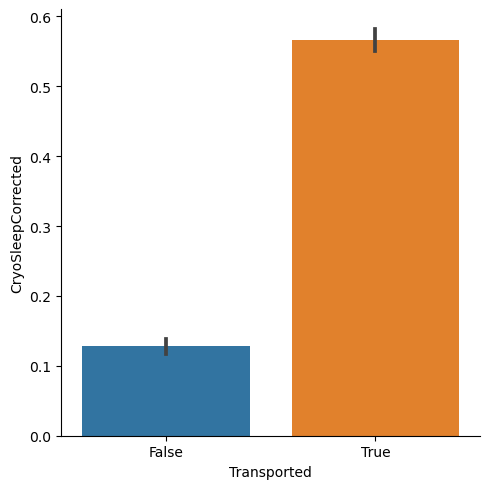

In [98]:
sns.catplot(kind='bar', x='Transported', y='CryoSleepCorrected',data=df_train1)

In [99]:
df_train1.dtypes

PassengerId               object
HomePlanetCorrected       object
CryoSleepCorrected        object
DestinationCorrected      object
Age                      float64
VIPCorrected              object
RoomServiceCorrected      object
FoodCourtCorrected        object
ShoppingMallCorrected     object
SpaCorrected              object
VRDeckCorrected           object
Transported                 bool
dtype: object

E:\AppInstalled\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


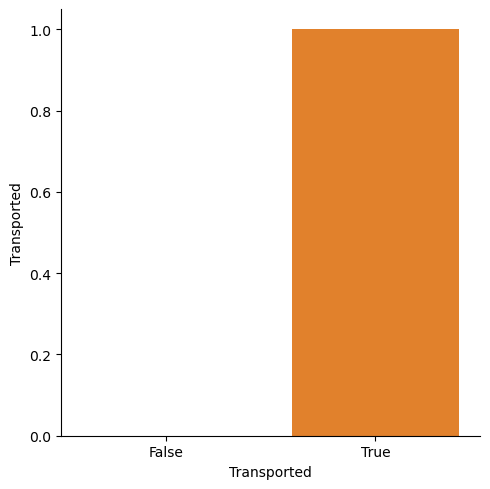

In [100]:
sns.catplot(kind='bar', x='Transported', y='Transported',data=df_train1)

In [101]:
# Correcting column with boolean values from object to bool type
m = {True: True, False:False}
df_train1['CryoSleepCorrected'] = df_train1['CryoSleepCorrected'].map(m)
df_train1['VIPCorrected'] = df_train1['VIPCorrected'].map(m)

In [102]:
df_train1.dtypes

PassengerId               object
HomePlanetCorrected       object
CryoSleepCorrected          bool
DestinationCorrected      object
Age                      float64
VIPCorrected                bool
RoomServiceCorrected      object
FoodCourtCorrected        object
ShoppingMallCorrected     object
SpaCorrected              object
VRDeckCorrected           object
Transported                 bool
dtype: object

In [103]:
# Converting True value as 1 and False as 0
m = {True: 1, False:0}
df_train1['CryoSleepCorrected'] = df_train1['CryoSleepCorrected'].map(m)
df_train1['VIPCorrected'] = df_train1['VIPCorrected'].map(m)
df_train1['Transported'] = df_train1['Transported'].map(m)

In [104]:
df_train1.head(10)

PassengerId HomePlanetCorrected  CryoSleepCorrected DestinationCorrected  \
0     0001_01              Europa                   0          TRAPPIST-1e   
1     0002_01               Earth                   0          TRAPPIST-1e   
2     0003_01              Europa                   0          TRAPPIST-1e   
3     0003_02              Europa                   0          TRAPPIST-1e   
4     0004_01               Earth                   0          TRAPPIST-1e   
5     0005_01               Earth                   0        PSO J318.5-22   
6     0006_01               Earth                   0          TRAPPIST-1e   
7     0006_02               Earth                   1          TRAPPIST-1e   
8     0007_01               Earth                   0          TRAPPIST-1e   
9     0008_01              Europa                   1          55 Cancri e   

    Age  VIPCorrected RoomServiceCorrected FoodCourtCorrected  \
0  39.0             0                  0.0                0.0   
1  24.0             0                109.0                9.0   
2  58.0             1                 43.0             3576.0   
3  33.0             0                  0.0             1283.0   
4  16.0             0                303.0               70.0   
5  44.0             0                  0.0              483.0   
6  26.0             0                 42.0             1539.0   
7  28.0             0                  0.0                0.0   
8  35.0             0                  0.0              785.0   
9  14.0             0                  0.0                0.0   

  ShoppingMallCorrected SpaCorrected VRDeckCorrected  Transported  
0                   0.0          0.0             0.0            0  
1                  25.0        549.0            44.0            1  
2                   0.0       6715.0            49.0            0  
3                 371.0       3329.0           193.0            0  
4                 151.0        565.0             2.0            1  
5                   0.0        291.0             0.0            1  
6                   3.0          0.0             0.0            1  
7                   0.0          0.0           False            1  
8                  17.0        216.0             0.0            1  
9                   0.0          0.0             0.0            1

In [105]:
df_train1.dtypes

PassengerId               object
HomePlanetCorrected       object
CryoSleepCorrected         int64
DestinationCorrected      object
Age                      float64
VIPCorrected               int64
RoomServiceCorrected      object
FoodCourtCorrected        object
ShoppingMallCorrected     object
SpaCorrected              object
VRDeckCorrected           object
Transported                int64
dtype: object

In [106]:
# Count unique Home Planets
df_train1['HomePlanetCorrected'].groupby(df_train1['HomePlanetCorrected']).filter(lambda x: len(x) > 1).value_counts()

HomePlanetCorrected
Earth     4477
Europa    2097
Mars      1730
Name: count, dtype: int64

In [107]:
#Count unique Destination Planets
df_train1['DestinationCorrected'].groupby(df_train1['DestinationCorrected']).filter(lambda x: len(x) > 1).value_counts()

DestinationCorrected
TRAPPIST-1e      5761
55 Cancri e      1764
PSO J318.5-22     779
Name: count, dtype: int64

In [108]:
df_train1.dtypes

PassengerId               object
HomePlanetCorrected       object
CryoSleepCorrected         int64
DestinationCorrected      object
Age                      float64
VIPCorrected               int64
RoomServiceCorrected      object
FoodCourtCorrected        object
ShoppingMallCorrected     object
SpaCorrected              object
VRDeckCorrected           object
Transported                int64
dtype: object

In [109]:
# Converting to Float Data Type
df_train1['RoomServiceCorrected'] = df_train1['RoomServiceCorrected'].astype(float)
df_train1['FoodCourtCorrected'] = df_train1['FoodCourtCorrected'].astype(float)
df_train1['ShoppingMallCorrected'] = df_train1['ShoppingMallCorrected'].astype(float)
df_train1['SpaCorrected'] = df_train1['SpaCorrected'].astype(float)
df_train1['VRDeckCorrected'] = df_train1['VRDeckCorrected'].astype(float)

In [110]:
X = df_train1.copy()
y = X.Transported
X.drop(['Transported'], axis=1, inplace=True)

In [111]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [112]:
# Applying one-hot encoder to column with categorical data
OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)

object_cat_cols = ['HomePlanetCorrected', 'DestinationCorrected']
OH_X_train=pd.DataFrame(OH_encoder.fit_transform(X_train[object_cat_cols]))
OH_X_test = pd.DataFrame(OH_encoder.transform(X_test[object_cat_cols]))

# One-hot encoding removed index; put it back
OH_X_train.index = X_train.index
OH_X_test.index = X_test.index

# Remove categorical columnns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cat_cols, axis=1)
num_X_test = X_test.drop(object_cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_X_test], axis=1)



E:\AppInstalled\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
OH_X_train.head(10)

PassengerId  CryoSleepCorrected   Age  VIPCorrected  \
5993     6344_01                   0   0.0             0   
8656     9233_01                   0  41.0             0   
1460     1543_01                   1  34.0             0   
262      0288_01                   0  19.0             0   
2171     2317_01                   0  39.0             0   
753      0790_01                   1  20.0             0   
5386     5756_02                   0  42.0             0   
3190     3439_01                   1  28.0             0   
2816     3034_01                   0  40.0             0   
4272     4549_01                   0  42.0             0   

      RoomServiceCorrected  FoodCourtCorrected  ShoppingMallCorrected  \
5993                   0.0                 0.0                    0.0   
8656                   3.0                 0.0                  668.0   
1460                   0.0                 0.0                    0.0   
262                    0.0                 0.0                    0.0   
2171                   0.0               454.0                    0.0   
753                    0.0                 0.0                    0.0   
5386                 439.0                 0.0                    0.0   
3190                   0.0                 0.0                    0.0   
2816                   0.0                 0.0                    0.0   
4272                   0.0                 1.0                    0.0   

      SpaCorrected  VRDeckCorrected    0    1    2    3    4    5  
5993           0.0              0.0  1.0  0.0  0.0  1.0  0.0  0.0  
8656           0.0              0.0  1.0  0.0  0.0  0.0  0.0  1.0  
1460           0.0              0.0  0.0  1.0  0.0  1.0  0.0  0.0  
262            0.0            828.0  1.0  0.0  0.0  1.0  0.0  0.0  
2171         454.0              0.0  1.0  0.0  0.0  0.0  0.0  1.0  
753            0.0              0.0  1.0  0.0  0.0  0.0  1.0  0.0  
5386           0.0            254.0  1.0  0.0  0.0  0.0  0.0  1.0  
3190           0.0              0.0  0.0  1.0  0.0  0.0  0.0  1.0  
2816           0.0              0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4272          17.0           1601.0  1.0  0.0  0.0  0.0  0.0  1.0

In [115]:
OH_X_train.head()

PassengerId  CryoSleepCorrected   Age  VIPCorrected  \
5993     6344_01                   0   0.0             0   
8656     9233_01                   0  41.0             0   
1460     1543_01                   1  34.0             0   
262      0288_01                   0  19.0             0   
2171     2317_01                   0  39.0             0   

      RoomServiceCorrected  FoodCourtCorrected  ShoppingMallCorrected  \
5993                   0.0                 0.0                    0.0   
8656                   3.0                 0.0                  668.0   
1460                   0.0                 0.0                    0.0   
262                    0.0                 0.0                    0.0   
2171                   0.0               454.0                    0.0   

      SpaCorrected  VRDeckCorrected    0    1    2    3    4    5  
5993           0.0              0.0  1.0  0.0  0.0  1.0  0.0  0.0  
8656           0.0              0.0  1.0  0.0  0.0  0.0  0.0  1.0  
1460           0.0              0.0  0.0  1.0  0.0  1.0  0.0  0.0  
262            0.0            828.0  1.0  0.0  0.0  1.0  0.0  0.0  
2171         454.0              0.0  1.0  0.0  0.0  0.0  0.0  1.0

In [116]:
OH_X_train.dtypes

PassengerId               object
CryoSleepCorrected         int64
Age                      float64
VIPCorrected               int64
RoomServiceCorrected     float64
FoodCourtCorrected       float64
ShoppingMallCorrected    float64
SpaCorrected             float64
VRDeckCorrected          float64
0                        float64
1                        float64
2                        float64
3                        float64
4                        float64
5                        float64
dtype: object